# B SOURABHGAGAN RAO
# 210968004
# Week 9 

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
df = pd.read_excel("C:/Users/dse/Documents/Online_Retail.xlsx")
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


## Data Cleaning


In [48]:

df=df.dropna()
print(df.isnull().sum())



InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [49]:
df.duplicated().sum()

5225

In [50]:

dataset=dataset.drop_duplicates()
dataset.duplicated().sum()

0

## Question 1) Read and write a summary of the metadata .


In [51]:
print(pd.DataFrame(df.info()))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB
Empty DataFrame
Columns: []
Index: []


In [52]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


## Question 2)  Select only the transactions that have occurred from 01/04/ 2011 and 09/12/2011 and create a dataset

In [53]:
df.set_index("InvoiceDate",inplace = True)

In [54]:
df= df[(df.index>='2011-04-01') & (df.index<='2011-12-09')]
df

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
InvoiceDate,,,,,,,
2011-04-01 08:22:00,548550,22662,LUNCH BAG DOLLY GIRL DESIGN,10,1.65,18161.0,United Kingdom
2011-04-01 08:22:00,548550,22296,HEART IVORY TRELLIS LARGE,12,1.65,18161.0,United Kingdom
2011-04-01 08:22:00,548550,21790,VINTAGE SNAP CARDS,12,0.85,18161.0,United Kingdom
2011-04-01 08:22:00,548550,22622,BOX OF VINTAGE ALPHABET BLOCKS,2,9.95,18161.0,United Kingdom
2011-04-01 08:22:00,548550,22393,PAPERWEIGHT VINTAGE COLLAGE,6,2.55,18161.0,United Kingdom
...,...,...,...,...,...,...,...
2011-12-08 20:01:00,581474,21253,SET OF PICTURE FRAME STICKERS,1,0.79,12748.0,United Kingdom
2011-12-08 20:01:00,581474,22108,PING! MICROWAVE PLATE,1,1.25,12748.0,United Kingdom
2011-12-08 20:01:00,581474,22167,OVAL WALL MIRROR DIAMANTE,1,9.95,12748.0,United Kingdom


## Question 3) Calculate the RFM values for each customer (by customer id). RFM represents:
## ->R (Recency) − Recency should be calculated as the number of months before he or she has made a purchase from the online store. If he/she made a purchase in the month of December 2011, then the Recency should be 0. If purchase is made in November 2011 then Recency should be 1 and so on and so forth.
## ->F (Frequency) − Number of invoices by the customer from 01/04/ 2011 and 09/12/2011.
## -> M (Monetary Value) − Total spend by the customer from 01/04/ 2011 and 09/12/2011.


In [55]:

df['R'] = 12-df.index.month


df['F'] = 0
customer_ids = list(df['CustomerID'].unique())
for id in customer_ids:
  df.loc[df['CustomerID']==id, 'F'] += df.groupby(by='CustomerID').InvoiceNo.size()[id]



df['Revenue'] = df.Quantity * df.UnitPrice
df['M'] = 0
for id in customer_ids:
  df.loc[df['CustomerID']==id, 'M'] += df.groupby(by='CustomerID').Revenue.sum()[id]



df_rfm = pd.DataFrame(customer_ids, columns=['Customer ID'])

df_rfm['R'] = 0
df_rfm['F'] = 0
df_rfm['M'] = 0


for id in customer_ids:
    df_rfm.loc[df_rfm['Customer ID']==id, 'R'] += df.loc[df['CustomerID']==id, 'R'].values[0]
    df_rfm.loc[df_rfm['Customer ID']==id, 'F'] += df.loc[df['CustomerID']==id, 'F'].values[0]
    df_rfm.loc[df_rfm['Customer ID']==id, 'M'] += df.loc[df['CustomerID']==id, 'M'].values[0]

## Question 4) Use the elbow method to identify how many customer segments exist, using the RFM values for each customer.

In [56]:
print("No of customer segments that exit is :")
print(df_rfm['R'].unique().size)
print("They are :")
df_rfm['R'].unique()

No of customer segments that exit is :
9
They are :


array([8, 7, 6, 5, 4, 3, 2, 1, 0], dtype=int64)

## Question 5) Create the customer segments with K-means algorithm by using number of clusters is suggested by elbow method.

In [57]:
from sklearn.cluster import KMeans

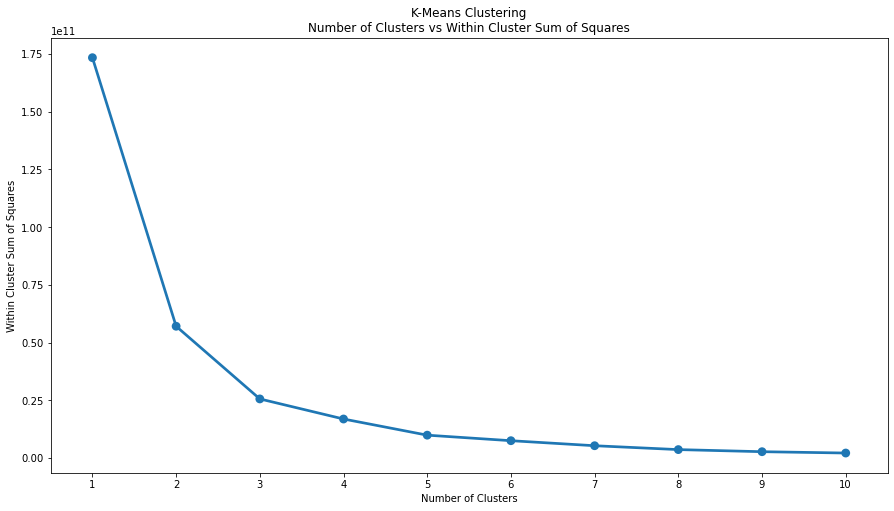

In [58]:

wcss = []


for k in range(0, 10):
  kmeans = KMeans(n_clusters=k+1, random_state=0).fit(df_rfm[['R', 'F', 'M']])
  wcss.append(kmeans.inertia_)


plt.figure(figsize=(15,8))
ax = sns.pointplot(x=list(range(1, 11)), y=wcss)
ax.set_title('K-Means Clustering\nNumber of Clusters vs Within Cluster Sum of Squares')
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Within Cluster Sum of Squares')
plt.show()

## Question 6) Plot the clusters in a scatter plot and mark each segment differently using lmplot

In [59]:

kmeans = KMeans(n_clusters=3, random_state=0).fit(df_rfm[['R', 'F', 'M']])

In [60]:

df_rfm['labels'] = kmeans.labels_

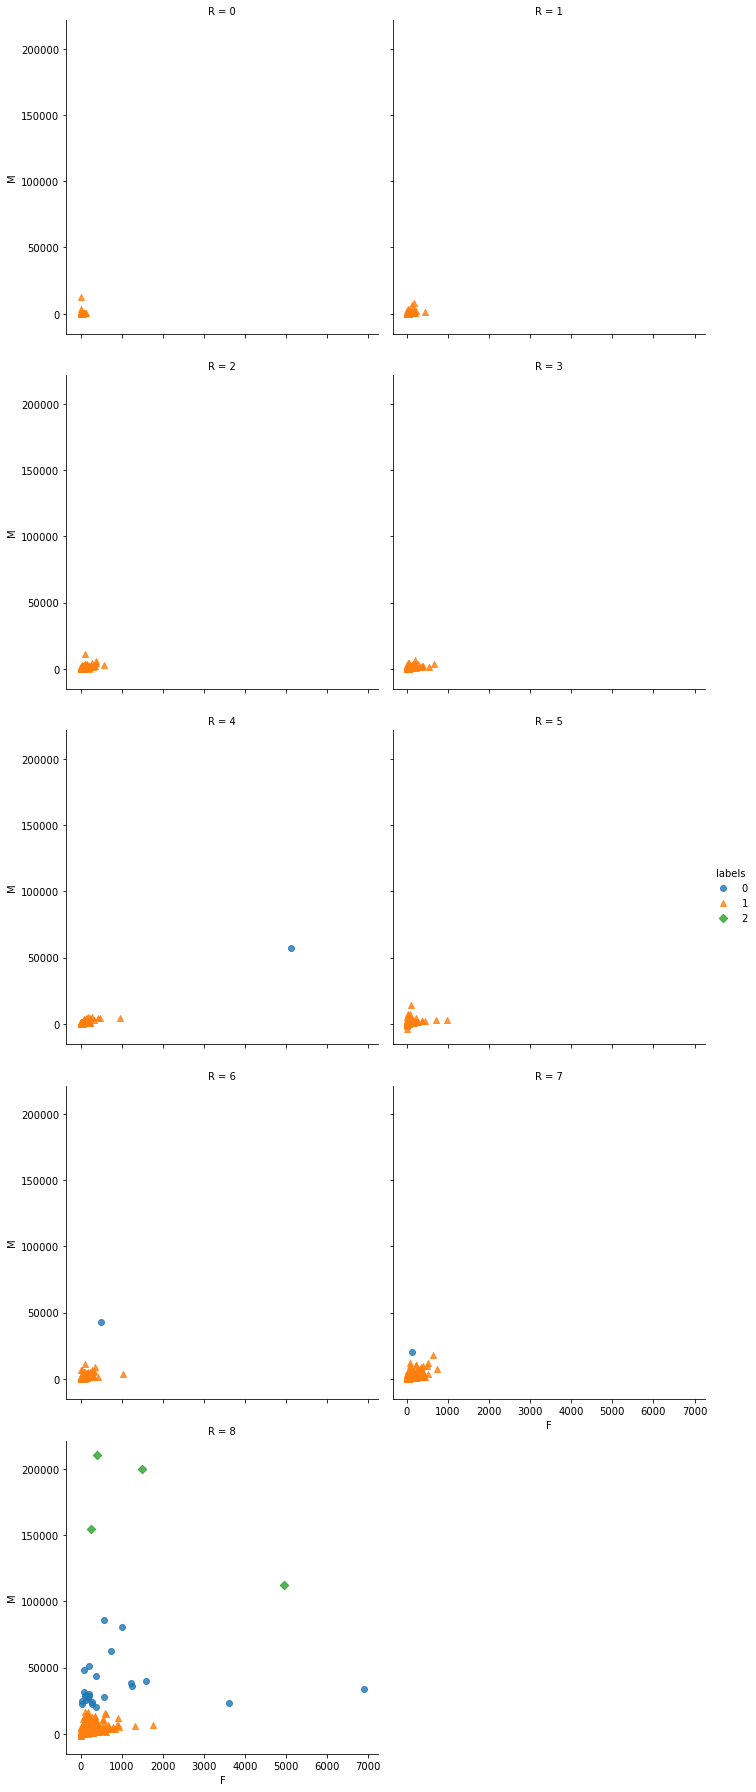

In [61]:

sns.lmplot(x='F', y='M', col='R', hue='labels', data=df_rfm, col_wrap=2, fit_reg=False, markers=['o', '^', 'D'])

## Question 7)  Print the cluster centers of each customer segment and explain them intuitively.

In [62]:

print("The cluster centres are :")
print(kmeans.cluster_centers_)
print()
print("The cluster centre of cluster:")
print("0 has a value of 4.38 for R, 68.6 for F, and 1212 for M (customers with Low Recency, Low Frequency and Low Monetary Value) - customers who are of little value.")
print()
print("1 has a value of 4.00 for R, 1296 for F, and 168158 for M (customers with Low Recency, High Frquency and High Monetary Value) - loyal customers who should be entered in the Loyalty Program and given special benefits.")
print()
print("2 has a value of 5.25 for R, 865 for F, and 39738 for M (customers with Low Recency, Medium Frequency, and Medium Monetary Value) - occasional shoppers - should be sent more promos and offers.")
print()
print("The wcss values are calculated by summing up the squared distaces between points and their cluster centers to analyze the quality of clusters(less the wcss,higher the quality)")

The cluster centres are :
[[7.74074074e+00 9.58629630e+02 3.72821481e+04]
 [5.04007286e+00 7.18899297e+01 1.18499044e+03]
 [8.00000000e+00 1.77550000e+03 1.69445050e+05]]

The cluster centre of cluster:
0 has a value of 4.38 for R, 68.6 for F, and 1212 for M (customers with Low Recency, Low Frequency and Low Monetary Value) - customers who are of little value.

1 has a value of 4.00 for R, 1296 for F, and 168158 for M (customers with Low Recency, High Frquency and High Monetary Value) - loyal customers who should be entered in the Loyalty Program and given special benefits.

2 has a value of 5.25 for R, 865 for F, and 39738 for M (customers with Low Recency, Medium Frequency, and Medium Monetary Value) - occasional shoppers - should be sent more promos and offers.

The wcss values are calculated by summing up the squared distaces between points and their cluster centers to analyze the quality of clusters(less the wcss,higher the quality)


## Question 8) Create the customer segments with Agglomerative algorithm by using number of clusters is suggested by elbow method.
### from sklearn.cluster import AgglomerativeClustering

In [63]:

from sklearn.cluster import AgglomerativeClustering
agglo = AgglomerativeClustering(n_clusters=3, compute_distances=True).fit(df_rfm[['R','F','M']])

## Question 9) Visualize the clusters using the dendrogram 

In [64]:

from scipy.cluster.hierarchy import dendrogram

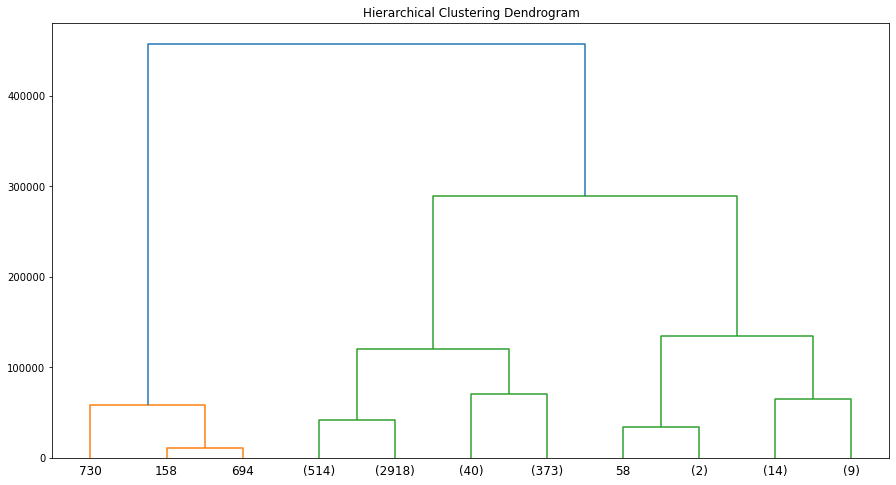

In [65]:
def plot_dendrogram(agglo, **kwargs):
    
    counts = np.zeros(agglo.children_.shape[0])
    n_samples = len(agglo.labels_)
    for i, merge in enumerate(agglo.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([agglo.children_, agglo.distances_, counts]).astype(float)

    dendrogram(linkage_matrix, **kwargs)
    

plt.figure(figsize=(15,8))
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(agglo, truncate_mode='level', p=3)
plt.show()

## Question 10) Compare the clusters obtained using KMeans vs. Agglomeration

In [66]:

labels_kmeans = list(kmeans.labels_)


labels_agglo = list(agglo.labels_)


print('Cluster 0 - KMeans: ', labels_kmeans.count(0))
print('Cluster 1 - KMeans: ', labels_kmeans.count(1))
print('Cluster 2 - KMeans: ', labels_kmeans.count(2))

print()


print('Cluster 0 - Agglomerative: ', labels_agglo.count(0))
print('Cluster 1 - Agglomerative: ', labels_agglo.count(1))
print('Cluster 2 - Agglomerative: ', labels_agglo.count(2))

Cluster 0 - KMeans:  27
Cluster 1 - KMeans:  3843
Cluster 2 - KMeans:  4

Cluster 0 - Agglomerative:  26
Cluster 1 - Agglomerative:  3
Cluster 2 - Agglomerative:  3845
